In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle



pd.set_option("display.max_columns", None)
shooting = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_season/shooting.csv")
defense = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_season/defense.csv")
passing = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_season/passing.csv")
possession = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_season/possession.csv")
gca = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/team_season/goal_shot_creation.csv")

prem_2025_2026_players = pd.read_csv("../data/processed/fbref/ENG-Premier League/2025-2026/player_season/standard.csv")
shooting_df = shooting.copy()

In [86]:
display(shooting_df.columns)
display(shooting_df)



Index(['league', 'season', 'team', 'players_used', '90s', 'gls', 'sh', 'sot',
       'sot_sot', 'sh_90', 'sot_90', 'g_sh', 'g_sot', 'dist', 'fk', 'pk',
       'pkatt', 'xg', 'npxg', 'npxg_sh', 'g_xg', 'np_g_xg', 'url',
       'unnamed_23_level_1_season', 'unnamed_24_level_1_league', 'team_id',
       'is_promoted', 'is_relegated'],
      dtype='object')

,league,season,team,players_used,90s,gls,sh,sot,sot_sot,sh_90,sot_90,g_sh,g_sot,dist,fk,pk,pkatt,xg,npxg,npxg_sh,g_xg,np_g_xg,url,unnamed_23_level_1_season,unnamed_24_level_1_league,team_id,is_promoted,is_relegated
0,ENG-Premier League,2526,ARS,21,7,14,105,27,25.7,15.00,3.86,0.11,0.44,15.1,2,2,2,11.9,10.3,0.10,2.1,1.7,/en/squads/18bb7c10/Arsenal-Stats,2025-2026,ENG-Premier League,18bb7c10,1,0
1,ENG-Premier League,2526,AVL,23,7,6,76,23,30.3,10.86,3.29,0.08,0.26,17.7,2,0,0,5.9,5.9,0.08,0.1,0.1,/en/squads/8602292d/Aston-Villa-Stats,2025-2026,ENG-Premier League,8602292d,1,0
2,ENG-Premier League,2526,BOU,23,7,11,90,30,33.3,12.86,4.29,0.11,0.33,18.4,8,1,1,8.4,7.6,0.08,2.6,2.4,/en/squads/4ba7cbea/Bournemouth-Stats,2025-2026,ENG-Premier League,4ba7cbea,1,0
3,ENG-Premier League,2526,BRE,20,7,9,55,23,41.8,7.86,3.29,0.15,0.35,14.6,0,1,2,8.4,6.9,0.13,0.6,1.1,/en/squads/cd051869/Brentford-Stats,2025-2026,ENG-Premier League,cd051869,1,0
4,ENG-Premier League,2526,BHA,20,7,10,79,27,34.2,11.29,3.86,0.10,0.30,18.9,5,2,3,11.2,8.9,0.11,-1.2,-0.9,/en/squads/d07537b9/Brighton-and-Hove-Albion-S...,2025-2026,ENG-Premier League,d07537b9,1,0
5,ENG-Premier League,2526,BUR,21,7,7,56,18,32.1,8.00,2.57,0.13,0.39,17.1,3,0,0,4.9,4.9,0.09,2.1,2.1,/en/squads/943e8050/Burnley-Stats,2025-2026,ENG-Premier League,943e8050,1,0
6,ENG-Premier League,2526,CHE,25,7,13,89,30,33.7,12.71,4.29,0.13,0.40,16.8,4,1,1,10.9,10.1,0.12,2.1,1.9,/en/squads/cff3d9bb/Chelsea-Stats,2025-2026,ENG-Premier League,cff3d9bb,1,0
7,ENG-Premier League,2526,CRY,20,7,9,87,33,37.9,12.43,4.71,0.09,0.24,16.4,0,1,1,12.7,11.9,0.14,-3.7,-3.9,/en/squads/47c64c55/Crystal-Palace-Stats,2025-2026,ENG-Premier League,47c64c55,1,0
8,ENG-Premier League,2526,EVE,19,7,9,82,24,29.3,11.71,3.43,0.10,0.33,16.3,3,1,1,9.7,8.9,0.11,-0.7,-0.9,/en/squads/d3fd31cc/Everton-Stats,2025-2026,ENG-Premier League,d3fd31cc,1,0
9,ENG-Premier League,2526,FUL,21,7,6,73,19,26.0,10.43,2.71,0.08,0.32,15.9,2,0,0,7.3,7.3,0.10,-1.3,-1.3,/en/squads/fd962109/Fulham-Stats,2025-2026,ENG-Premier League,fd962109,1,0


C:\Users\oukan\AppData\Local\Temp\ipykernel_13192\1184725710.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shooting_df.sort_values(by ="gls", ascending = False), x="gls", y="team", ax=axes[0,0], palette=palette)


Text(0.5, 1.0, 'Goals Leaders')

<Figure size 640x480 with 0 Axes>

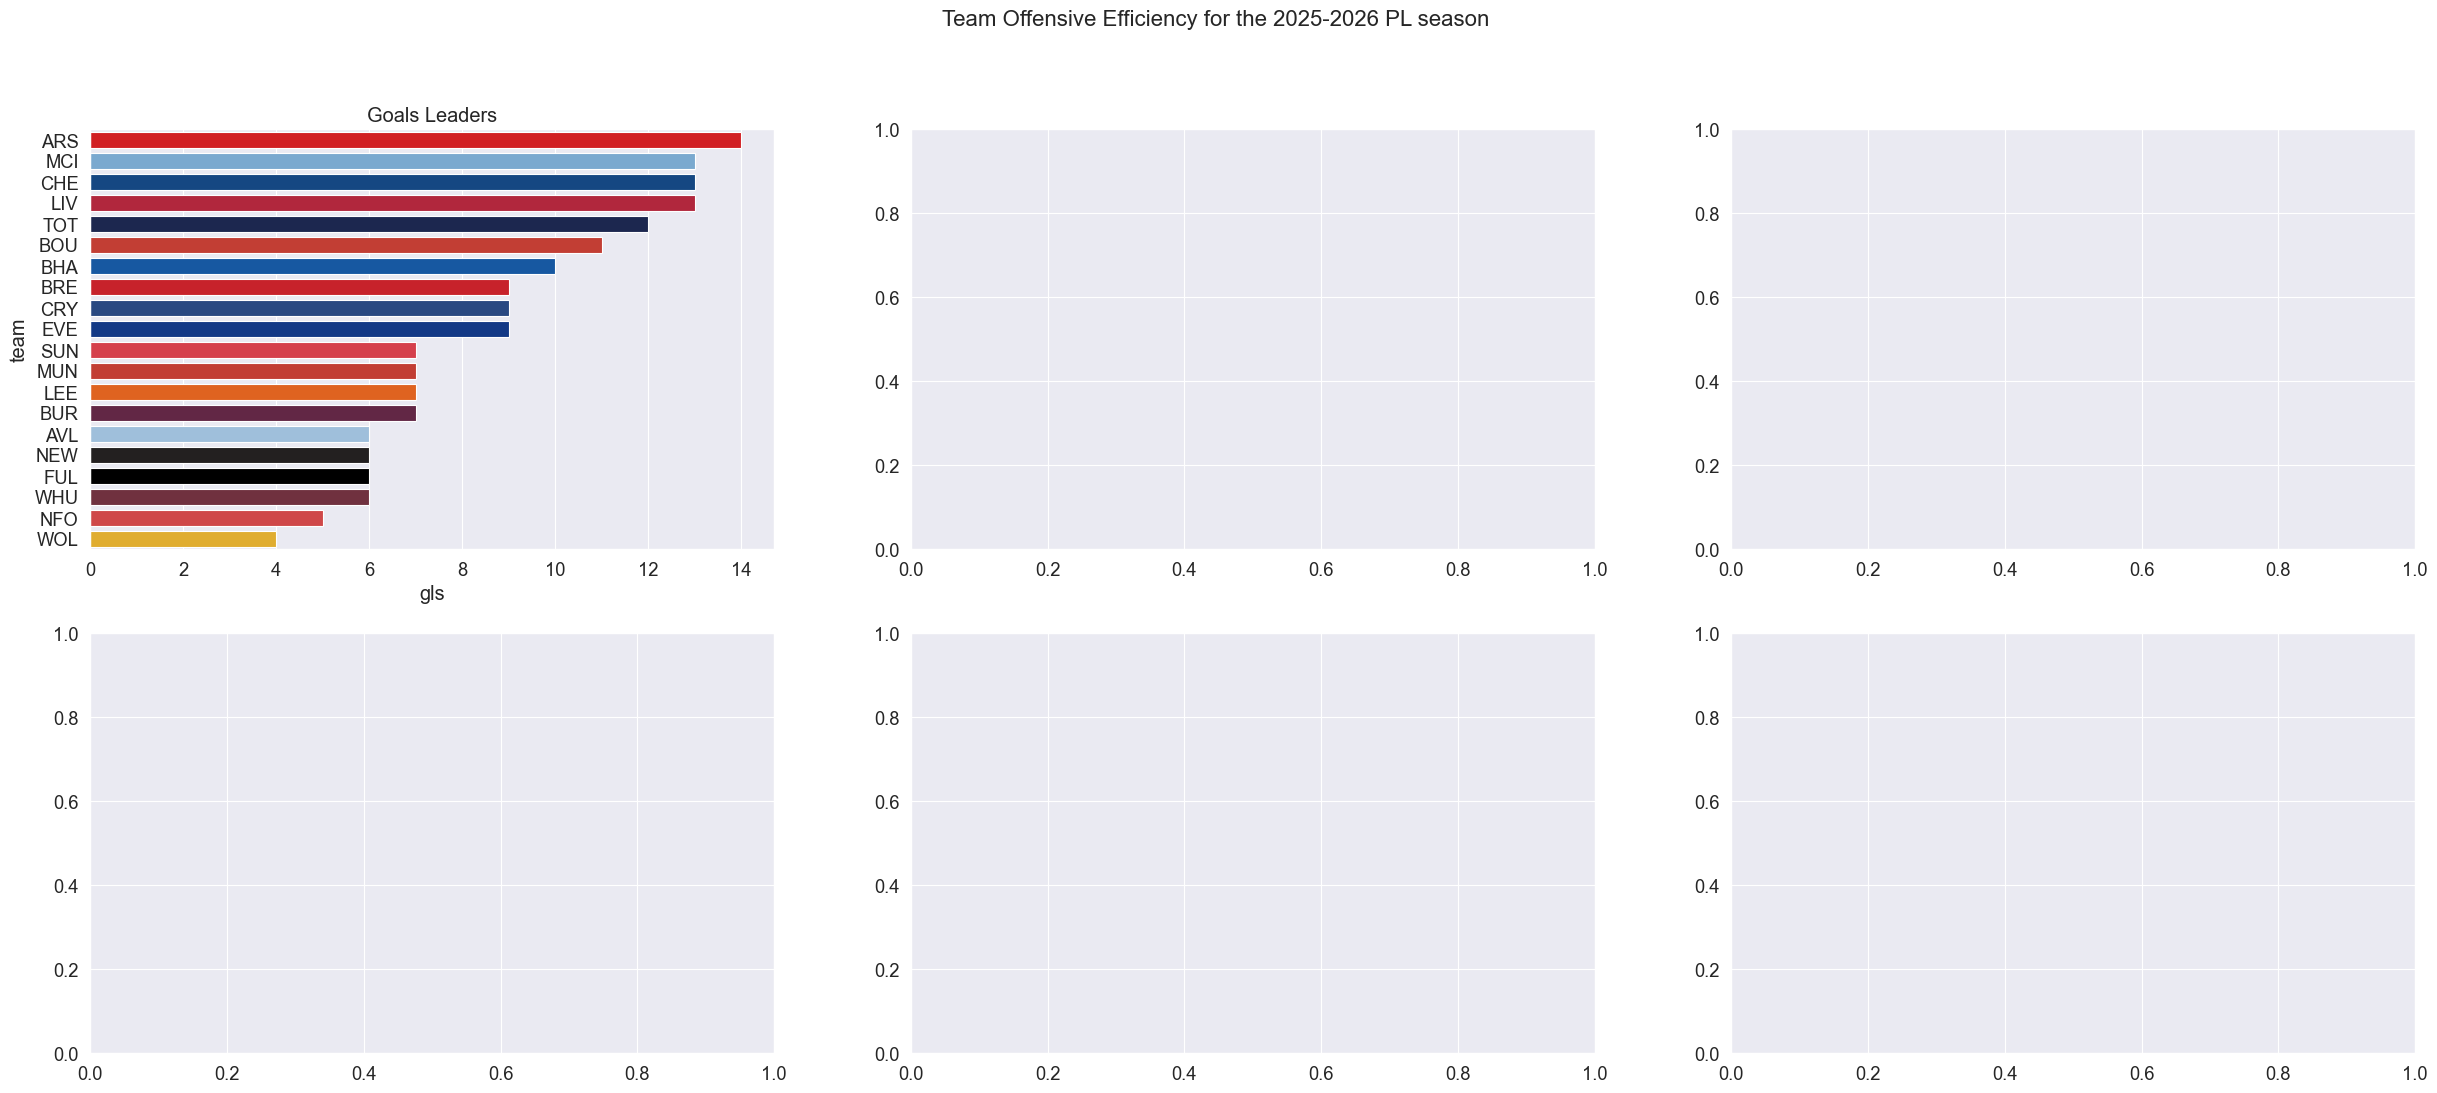

In [ ]:
sns.despine()
sns.set_theme(style="darkgrid")
sns.set_context("paper", font_scale=1.5)


fig, axes = plt.subplots(2, 3, figsize=(30, 12))
fig.suptitle("Team Offensive Efficiency for the 2025-2026 PL season", fontsize=16)


#defining the metrics and variables

# Non-penalty expected goals per shot (npxg_ps)
npxg_ps = shooting_df.groupby("team")["npxg_sh"].sum()

# Expected goals per shot (xg_ps)
xg_ps = (shooting_df.groupby("team")["xg"].sum()) / (shooting_df.groupby("team")["sh"].sum())

# Shots per 90 minutes (sh_90)
sh_90 = shooting_df.groupby("team")["sh_90"].sum()

# goals per team (gls) - aggregate by team to get a Series we can sort
gls = shooting_df.groupby("team")["gls"].sum()

# Define a color palette
palette = {
    "ARS": "#EF0107",
    "AVL": "#95BFE5",
    "BOU": "#DA291C",
    "BRE": "#E30613",
    "BHA": "#0057B8",
    "CHE": "#034694",
    "CRY": "#1B458F",
    "EVE": "#003399",
    "FUL": "#000000",
    "LIV": "#C8102E",
    "LEE": "#FF5A00",
    "MCI": "#6CABDD",
    "MUN": "#DA291C",
    "NEW": "#241F20",
    "NFO": "#E53233",
    "SUN": "#EE2737",
    "TOT": "#132257",
    "WHU": "#7A263A",
    "WOL": "#FDB913",
    "BUR": "#6C1D45",
}


regions = [
    ("Low xG • Low xG per Shot",    (0.25, 0.25)),  # bottom-left
    ("Low xG • High xG per Shot", (0.25, 0.75)),  # top-left
    ("High xG • High xG per Shot",  (0.75, 0.75)),  # top-right
    ("High xG • Low xG per Shot",   (0.75, 0.25)),  # bottom-right
]

# First Plot: goals leaders (use the aggregated & sorted series)
sns.barplot(data=shooting_df.sort_values(by ="gls", ascending = False), x="gls", y="team", ax=axes[0,0], palette=palette)
axes[0,0].set_title("Goals Leaders")
